In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

**Завдання 1.** Обчислення власних значень та векторів матриці 

In [13]:
A = np.array([[1, 2], [2, 1]])
eig_values, eig_vectors = np.linalg.eig(A)

eig_values, eig_vectors

(array([ 3., -1.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

Перевірка рівності  $A \cdot v = \lambda \cdot v$

In [14]:
mat_multiplication = np.dot(A, eig_vectors)
eig_multiplication = eig_values * eig_vectors

eig_multiplication, mat_multiplication

(array([[ 2.12132034,  0.70710678],
        [ 2.12132034, -0.70710678]]),
 array([[ 2.12132034,  0.70710678],
        [ 2.12132034, -0.70710678]]))

Як видно із виводу у консоль, матриці є рівними

**Завдання 2.** Реалізація методу зменшення розмірності зображення за допомогою аналізу головних компонент (PCA: Image Compression)


(1280, 1138, 3)


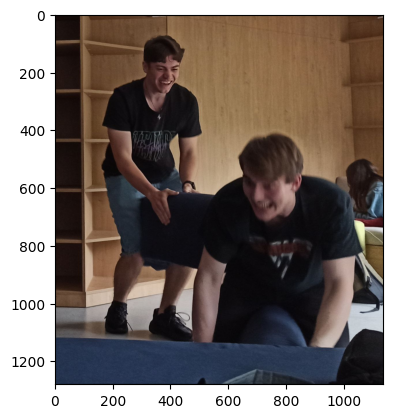

In [29]:
image_raw = plt.imread("image.jpg")

print(image_raw.shape)

plt.imshow(image_raw)

716


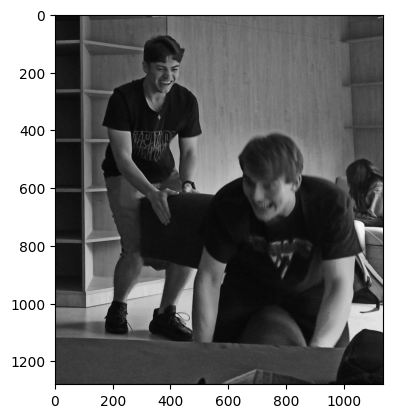

In [30]:
image_sum = image_raw.sum(axis=2)

print(image_sum.max())

image_bw = image_sum / image_sum.max()

plt.imshow(image_bw, cmap="gray")

In [32]:
pca = PCA()

pca.fit(image_bw)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.where(cumulative_variance >= 0.95)[0][0] + 1

print(f"Number of or 95% variance: {num_components}")

cumulative_variance

Number of or 95% variance: 24


array([0.34546888, 0.55234175, 0.64650587, ..., 1.        , 1.        ,
       1.        ])

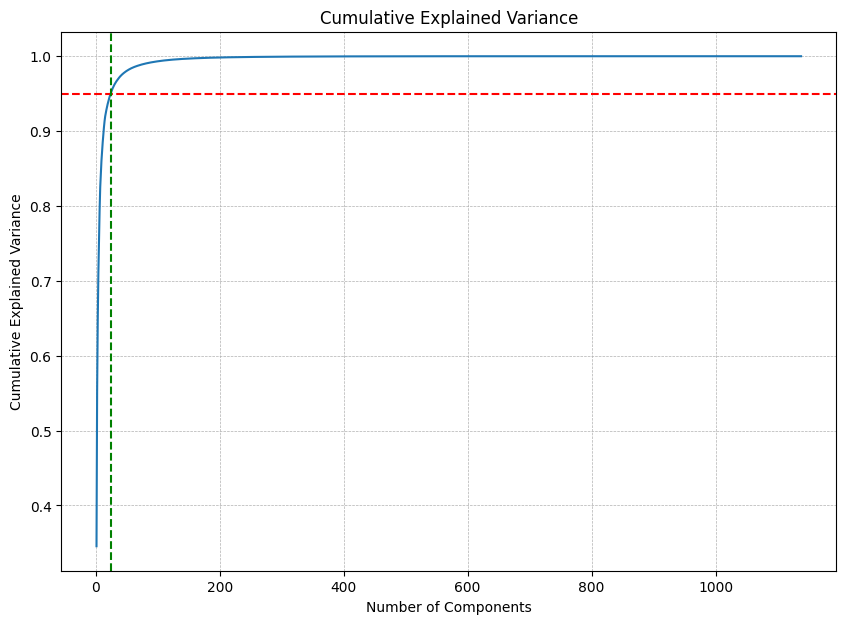

In [25]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)

plt.title("Cumulative Explained Variance explained by the components")

plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance")

plt.axhline(y=0.95, color="r", linestyle="--")
plt.axvline(x=num_components, color="g", linestyle="--")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

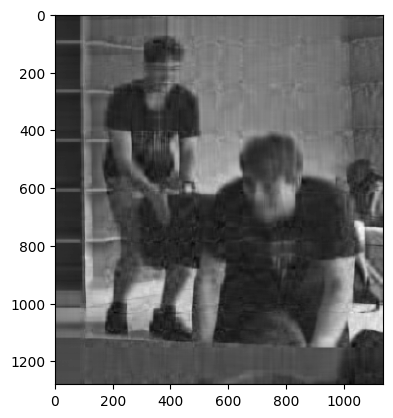

In [33]:
pca = PCA(n_components=num_components)

image_bw_pca = pca.fit_transform(image_bw)

image_reconstructed = pca.inverse_transform(image_bw_pca)

plt.imshow(image_reconstructed, cmap="gray")
plt.show()

Порівняння реконострукції з різною кількістю компонент

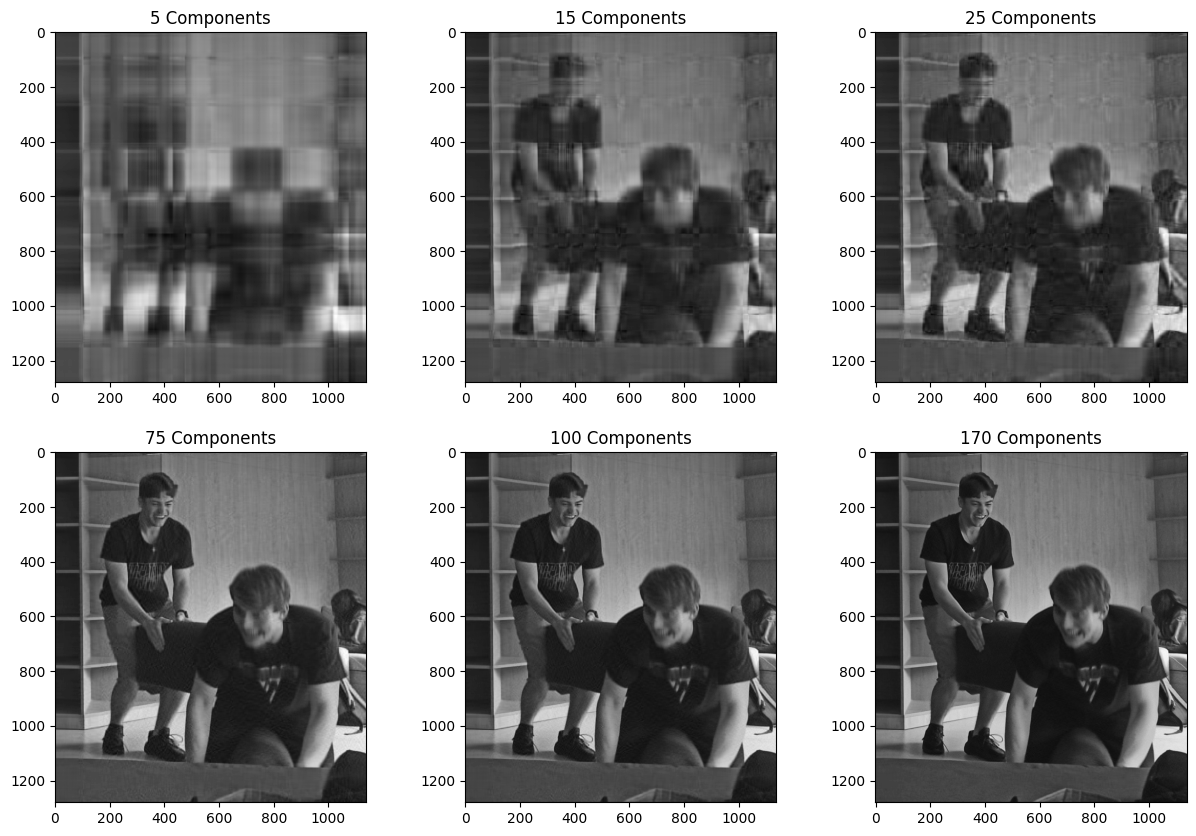

In [34]:
fig = plt.figure(figsize=(15, 10))
ax = fig.subplots(2, 3)

for i, n in enumerate([5, 15, 25, 75, 100, 170]):
    pca = PCA(n_components=n)
    image_bw_pca = pca.fit_transform(image_bw)
    image_reconstructed = pca.inverse_transform(image_bw_pca)

    ax[i // 3, i % 3].imshow(image_reconstructed, cmap="gray")
    ax[i // 3, i % 3].set_title(f"{n} Components")

plt.show()

Як бачимо, після 75 компонент включно, зображення вже майже не відрізняються від оригіналу.

**Завдання 3.** Використання діагоналізації, власних значень та векторів в криптографії.

In [49]:
original_message = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Morbi sollicitudin condimentum tristique. Maecenas ut neque lorem. Donec non orci enim. Nam mollis justo sit amet interdum sagittis. Cras ac pretium ligula. Quisque eu justo mi. Fusce a vestibulum lectus. Sed pharetra scelerisque arcu id malesuada. Nam nisi tellus, fermentum sit amet massa sed, viverra pulvinar lacus. Suspendisse vehicula ultrices quam, quis posuere mi accumsan at. Nam condimentum leo sed sollicitudin tincidunt. Duis tempus gravida consectetur."

random_key_matrix = np.random.randint(
    0, 256, (len(original_message), len(original_message))
)

message_chunks = [
    original_message[i : i + len(original_message)]
    for i in range(0, len(original_message), len(original_message))
]

eigenvalues, eigenvectors = np.linalg.eig(random_key_matrix)

diagonalized_key_matrix = np.dot(
    np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors)
)

encrypted_message_vectors = []

for chunk in message_chunks:
    message_vector = np.array([ord(char) for char in chunk])
    encrypted_vector = np.dot(diagonalized_key_matrix, message_vector)
    encrypted_message_vectors.append(encrypted_vector)

encrypted_message_vectors

[array([6226171.99999995+2.16435941e-09j, 6341464.00000003+3.91090692e-09j,
        6343531.00000005-1.63480683e-08j, 6535834.00000002+2.07563470e-09j,
        6330429.00000002+1.66523750e-08j, 6466555.00000003+7.98809680e-09j,
        6287191.        -6.42986443e-09j, 6497529.00000004-5.97596672e-09j,
        6508947.00000001+1.05235801e-09j, 6073348.00000003+9.57509353e-09j,
        6224339.99999999-9.42829100e-09j, 6492568.00000003-3.52912098e-09j,
        6315786.00000003-1.28438656e-08j, 6143909.00000001-7.40102030e-10j,
        6081056.99999997-1.44733085e-08j, 6540555.00000003+9.99185812e-09j,
        6187216.        +5.12590536e-09j, 6398790.00000001+3.41897949e-08j,
        6664199.00000001+8.77610558e-09j, 6130528.00000002-5.43813515e-10j,
        6113835.        +5.57573929e-09j, 6445268.00000002-1.51352180e-08j,
        6079545.99999998-1.31457650e-08j, 6227443.00000001+1.28796773e-08j,
        6292237.00000001+1.60955420e-08j, 6292820.00000002+2.38873610e-09j,
        6669

In [50]:
decrypted_vector = np.dot(
    np.linalg.inv(diagonalized_key_matrix), encrypted_message_vectors[0]
)
decrypted_message = "".join(
    [chr(int(np.round(char.real))) for char in decrypted_vector]
)

original_message, decrypted_message

('Lorem ipsum dolor sit amet, consectetur adipiscing elit. Morbi sollicitudin condimentum tristique. Maecenas ut neque lorem. Donec non orci enim. Nam mollis justo sit amet interdum sagittis. Cras ac pretium ligula. Quisque eu justo mi. Fusce a vestibulum lectus. Sed pharetra scelerisque arcu id malesuada. Nam nisi tellus, fermentum sit amet massa sed, viverra pulvinar lacus. Suspendisse vehicula ultrices quam, quis posuere mi accumsan at. Nam condimentum leo sed sollicitudin tincidunt. Duis tempus gravida consectetur.',
 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Morbi sollicitudin condimentum tristique. Maecenas ut neque lorem. Donec non orci enim. Nam mollis justo sit amet interdum sagittis. Cras ac pretium ligula. Quisque eu justo mi. Fusce a vestibulum lectus. Sed pharetra scelerisque arcu id malesuada. Nam nisi tellus, fermentum sit amet massa sed, viverra pulvinar lacus. Suspendisse vehicula ultrices quam, quis posuere mi accumsan at. Nam condimentum leo sed solli